# CSE 144 Fall 2023 HW 2

In this assignment, your goal is to build a logistic regression classifier on a simple synthetic dataset (included in train.csv and test.csv).

## Instruction 

- Submit your assignments onto **Canvas** by the due date.
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 
- Don't change the input and output structure of pre-defined functions. Most coding parts can be finished with about 5-6 lines of codes. 
- Remember that tuning on the test loss is prohibited.

## Rubric

The assignment is worth 65 points in total:
- Data (10 points)
- Model (45 points)
    - initialization (5 points)
    - gradient descent (5 points)
    - sigmoid (5 points)
    - cross-entropy loss (5 points)
    - derivative cross-entropy loss (5 points)
    - accuracy (5 points)
    - Train (10 points)
    - Evaluate (5 points)
- Trainer (10 points)
    - Define trainer and train (5 points)
    - Evaluate (5 points)

# Dataset preparation
In the cell below, you will read training and test data. You should spile the dataset into features and labels for each of training, validation, and test sets. 

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def plot_data(x: np.ndarray, y: np.ndarray) -> None:
    """
    Plot a dataset with 2-d feature vectors and binary labels. 

    Args:
        x: 2-d feature vectors
        y: 1-d binary labels.
    """
    class0_idx = np.where(y == 0)[0]
    class1_idx = np.where(y == 1)[0]
    feature0 = x[:, 0]
    feature1 = x[:, 1]
    plt.scatter(feature0[class0_idx], feature1[class0_idx], label="0")
    plt.scatter(feature0[class1_idx], feature1[class1_idx], label="1")
    plt.legend()
    plt.show()


def plot_decision_boundary(theta, x) -> None:
    """
    Plot the decision boundary using theta. Use this function with plot_data().

    Args:
        theta: a 3-d weight vector.
        x: 2-d feature vectors, which is used to decide the span of the decision
           boundary.
    """
    xx = np.linspace(min(x[:, 0]), max(x[:, 0]))
    yy = (-theta[1] / theta[2]) * xx - (theta[0]) / theta[2]
    plt.plot(xx, yy, color="red", label="boundary")
    plt.ylim(min(x[:, 1]), max(x[:, 1]))


# Read datasts and split your training data into train & validation sets. Split
# features from labels after that.
# ========== YOUR CODE STARTS HERE =========

train = pd.read_csv("./train.csv")
# note that "test/train"_x initially have all data, 
# since labels's are popped, they then are only left with the features. 
x_test = pd.read_csv("./test.csv")

y_train = train.pop('label')
y_test = x_test.pop('label') 

x_train, x_val, y_train, y_val = train_test_split(train, y_train, test_size = 0.2)


x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# ========== YOUR CODE ENDS HERE ==========
y_train = y_train.reshape((y_train.shape[0], 1))
y_val = y_val.reshape((y_val.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(640, 2) (640, 1)
(160, 2) (160, 1)
(200, 2) (200, 1)


## Plot training and validation sets

In [162]:
x_train.shape

(640, 2)

In [163]:
#plot_data(x_train, y_train)
#plot_data(x_val, y_val)
print(x_train.shape[0])

2


# Logistic regression
You'll complete the missing parts in the eight functions in the `LogisticRegressionTrainer` class below. Note that you are not supposed to return anything in `gradient_descent_step()` but update the parameters. Especially, do not forget to add the regularization term in `cross_entropy_loss()`.

In [174]:
class LogisticRegressionTrainer:
    def __init__(
        self,
        num_features: int,
        learning_rate: float = 1e-2,
        num_epochs: int = 500,
        lambd: float = 0.0,
    ) -> None:
        """Initialize a logisitc regression trainer."""
        self.lambd = lambd
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = num_features
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        self.test_loss = None
        self.test_acc = None

        # Initialize weights for your model. You can use any initialization methods.
        # ========== YOUR CODE STARTS HERE ==========
        self.thetas = np.zeros((x_train.shape[1] + 1, 1))
        # ========== YOUR CODE ENDS HERE ==========

    def gradient_descent_step(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Perform a single step of gradient update.

        Args:
            x: A matrix of features.
            y: A vector of labels.
        """
        # ========== YOUR CODE STARTS HERE ==========
        # m is len of labels
        # error is calculated by cross entropy loss :D
        # regular is lambd * self.theta 
        # print(x.shape, self.thetas.shape)
        # pred = self.sigmoid(x @ self.thetas)
        # pred pre-calculated
        # here, x is the predicted values, scaled by sigmoid
        # error = x - y
        # regular = self.lambd * self.thetas
        grad = self.cross_entropy_loss_derivative(x, y) # cross entropy loss + dReg/dtheta * sum(theta^2)
        # m = y.shape[0]
        # gradient = ((x.T @ error) + regular )/ m # self.cross_entropy_loss_derivative(x, y)
        self.thetas = self.thetas - (self.learning_rate * grad)
        # ========== YOUR CODE ENDS HERE ==========

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Convert raw model output (logits) to probabilities.

        Args:
            z: Raw model output (logits).

        Returns:
            A vector (or float, if your input is a scalar) of probabilties.
        """
        # ========== YOUR CODE STARTS HERE ==========
        return 1 / (1 + np.exp(-z))
        # ========== YOUR CODE ENDS HERE ==========

    def cross_entropy_loss(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Calculates the binary cross-entropy loss given predictions and targets.
        The loss function should add the regularization term.

        Args:
            pred: Predicted labels (probabilities).
            target: Ground-truth labels.

        Returns:
            A scalar of loss.
        """
        assert pred.shape == target.shape
        # ========== YOUR CODE STARTS HERE ==========
        # ========== YOUR CODE ENDS HERE ==========

        cross_entropy = -1 * (target * np.log(pred) + (1-target) * np.log(1-pred))
        cross_entropy = cross_entropy.mean()
        
        regularizer = self.lambd * np.sum(np.square(self.thetas[1:]))
        # cross_entropy += regularizer
        return cross_entropy

    def cross_entropy_loss_derivative(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate the derivative of the loss function w.r.t. theta. The derivative of the
        loss function should also add the derivative of the L2 regularization term.

        Args:
            x: Feature vectors.
            y: Ground-truth labels.

        Returns:
            A vector with the same dimension as theta, where each element is the
            partial derivative of the loss function w.r.t. the corresponding element
            in theta.
        """
        # ========== YOUR CODE STARTS HERE ==========
        # ========== YOUR CODE ENDS HERE ==========
        # print(self.thetas.shape, x.T.shape)
        size, features = x.shape
        pred = x @ self.thetas # should be (1, n)
        activated = self.sigmoid(pred)
        difference = activated - y
        
        grad = x.T @ difference / size
        
        regularizer = self.lambd * np.sum(self.thetas[1:])
        
        grad += regularizer
        
        return grad

    def accuracy(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Calculates the percentage of matched labels given predictions and targets.

        Args:
            pred: Predicted labels (rounded probabilities).
            target: Ground-truth labels.

        Return:
            The accuracy score (a float) given the predicted labels and the true labels.
        SOFTMAX ALG
        """
        assert pred.shape == target.shape
        # ========== YOUR CODE STARTS HERE ==========
        pred = np.rint(pred).astype(int)
        return np.sum(pred == target)/len(target)
        # ========== YOUR CODE ENDS HERE ==========

    def train(
        self,
        x_train: np.ndarray,
        y_train: np.ndarray,
        x_val: np.ndarray,
        y_val: np.ndarray,
    ) -> None:
        """
        Run gradient descent for n epochs, where n = self.num_epochs. In every epoch,
            1. Update theta.
            2. Calculate the training loss & accuracy given the current theta, and append 
               then to self.train_loss_history and self.train_acc_history.
            3. Calculate the validation loss & accuracy given the current theta, and 
               append then to self.train_loss_history and self.train_acc_history.

        If you wish to use the bias trick, please remember to use it before the for loop.
        Args:
            x_train: Feature vectors for training.
            y_train: Ground-truth labels for training.
            x_val: Feature vectors for validation.
            y_val: Ground-truth labels for validation.
        """
        x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
        x_val = np.hstack((np.ones((x_val.shape[0], 1)), x_val))
        
        # ========== YOUR CODE STARTS HERE ==========
        for n in range(self.num_epochs):
            self.gradient_descent_step(x_train, y_train)
    
            t_pred = self.sigmoid(x_train @ self.thetas)
            v_pred = self.sigmoid(x_val @ self.thetas)
            #print("SHape", t_pred.shape, y_train.shape)
            
            trainLoss = self.cross_entropy_loss(t_pred, y_train)
            valLoss = self.cross_entropy_loss(v_pred, y_val)
            trainAcc = self.accuracy(t_pred, y_train)
            valAcc = self.accuracy(v_pred, y_val)
    
            self.train_loss_history.append(trainLoss)
            self.train_acc_history.append(trainAcc)
    
            self.val_loss_history.append(valLoss)
            self.val_acc_history.append(valAcc)
    
        # ========== YOUR CODE ENDS HERE ==========

    def evaluate(self, x_test: np.ndarray, y_test: np.ndarray) -> None:
        """
        Evaluate the model on test set and store the test loss int self.test_loss and 
        test accuracy in self.test_acc. In other words, you should get the test loss and accraucy here.

        If you used the bias trick in train(), you have to also use it here.

        Args:
            x_test: Feature vectors for testing.
            y_test: Ground-truth labels for testing.
        """
        # ========== YOUR CODE STARTS HERE ==========

        x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
        
        # ========== YOUR CODE STARTS HERE ==========
        pred = self.sigmoid(np.dot(x_test, self.thetas))
        
        self.gradient_descent_step(x_test, y_test)
        
        testLoss = self.cross_entropy_loss(pred, y_test)
        
        testAcc = self.accuracy(pred, y_test)
    
        self.test_acc = testAcc
        self.test_loss = testLoss

        # ========== YOUR CODE ENDS HERE ==========

## Train a logistic regression classifier

Final train loss: 0.46113575331251627
Final validation loss: 0.46528477256145495
Final train acc: 0.8484375
Final validation acc: 0.86875


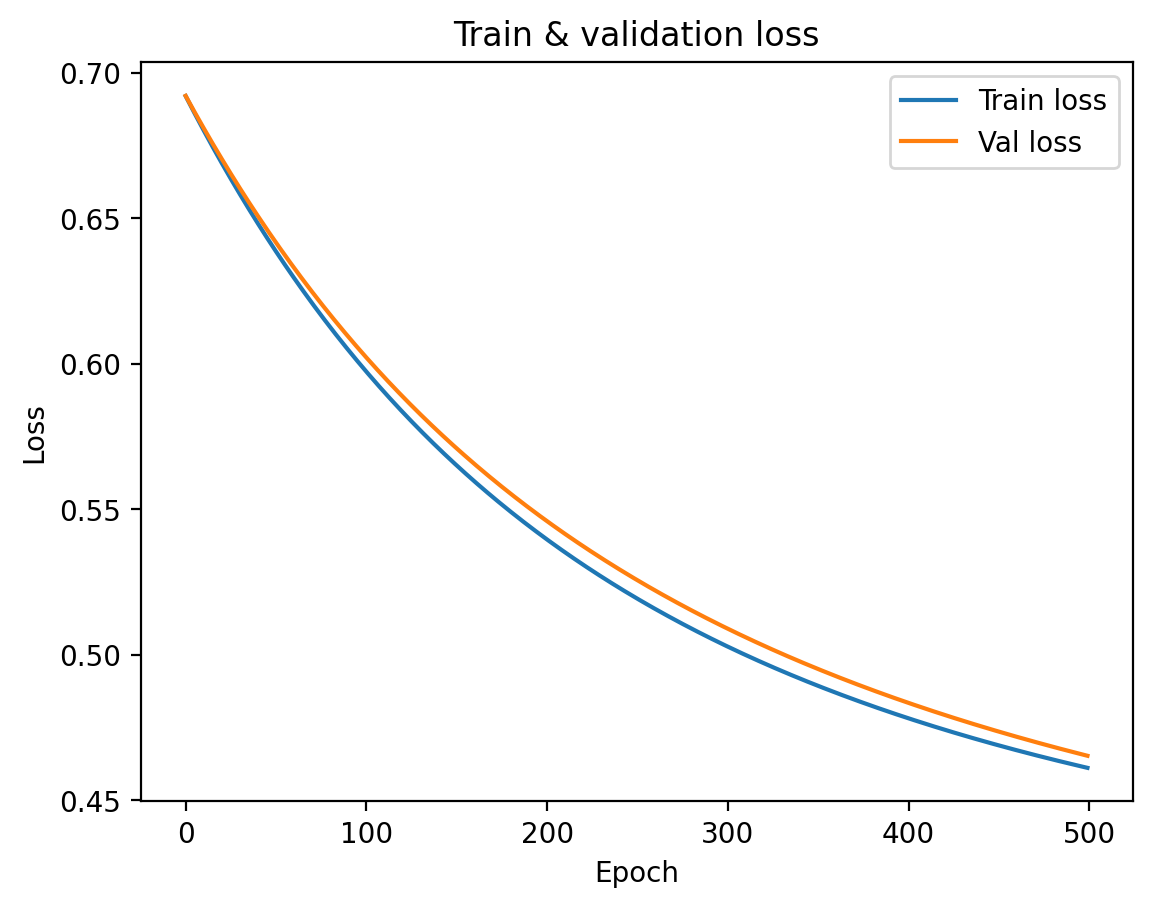

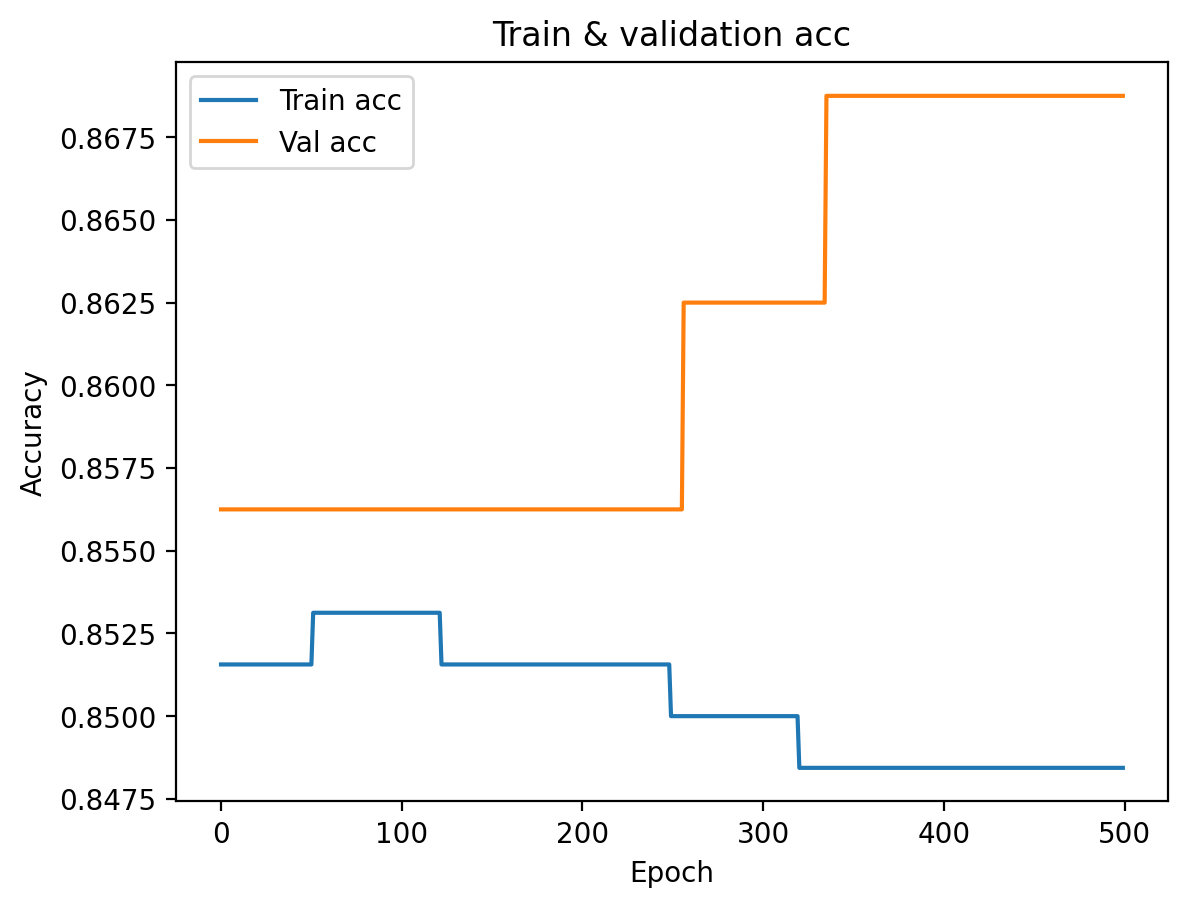

In [175]:
# Train a logistic regression classifier
# ========== YOUR CODE STARTS HERE ==========

trainer = LogisticRegressionTrainer(2)
trainer.train(x_train, y_train, x_val, y_val)

# ========== YOUR CODE ENDS HERE ==========

print(f"Final train loss: {trainer.train_loss_history[-1]}")
print(f"Final validation loss: {trainer.val_loss_history[-1]}")
print(f"Final train acc: {trainer.train_acc_history[-1]}")
print(f"Final validation acc: {trainer.val_acc_history[-1]}")

plt.plot(np.arange(trainer.num_epochs), trainer.train_loss_history, label="Train loss")
plt.plot(np.arange(trainer.num_epochs), trainer.val_loss_history, label="Val loss")
plt.title("Train & validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(np.arange(trainer.num_epochs), trainer.train_acc_history, label="Train acc")
plt.plot(np.arange(trainer.num_epochs), trainer.val_acc_history, label="Val acc")
plt.title("Train & validation acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Plotting decision boundaries

My logistic regression weights: [[-0.07887113]
 [ 2.17258579]
 [ 0.1251389 ]]


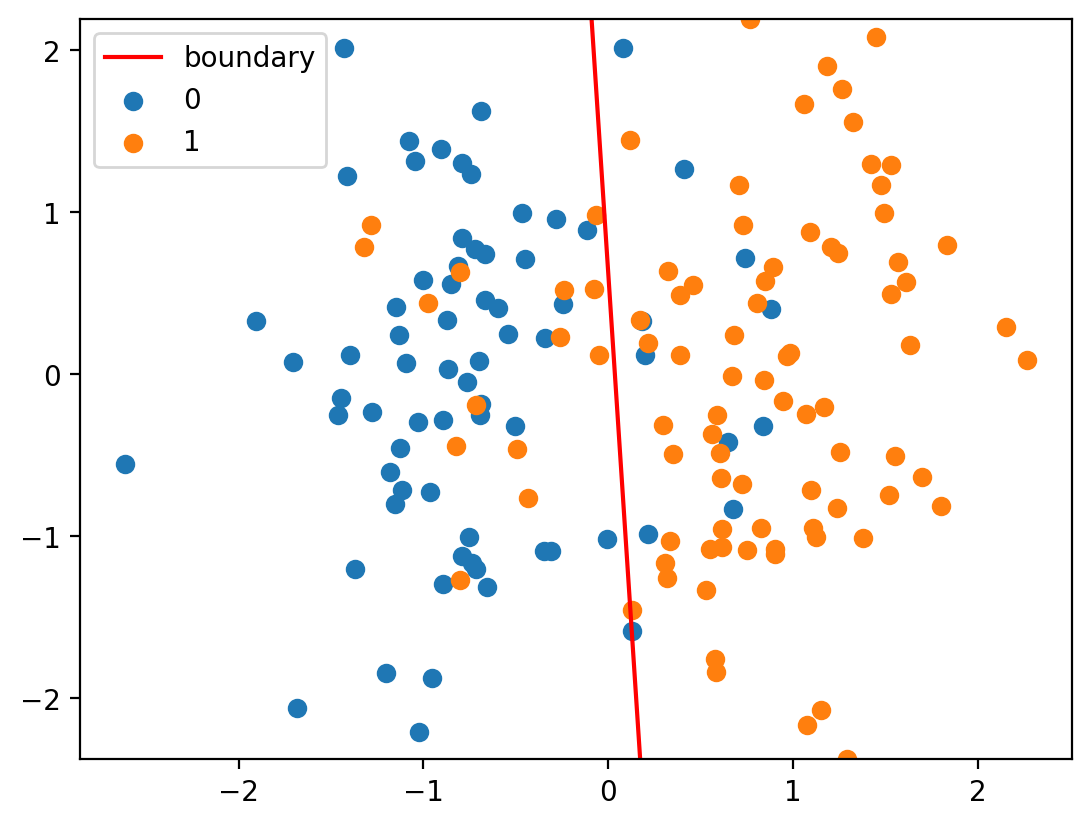

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sklearn logisitic regression weights: [-0.07721356  2.12025192  0.12108991]


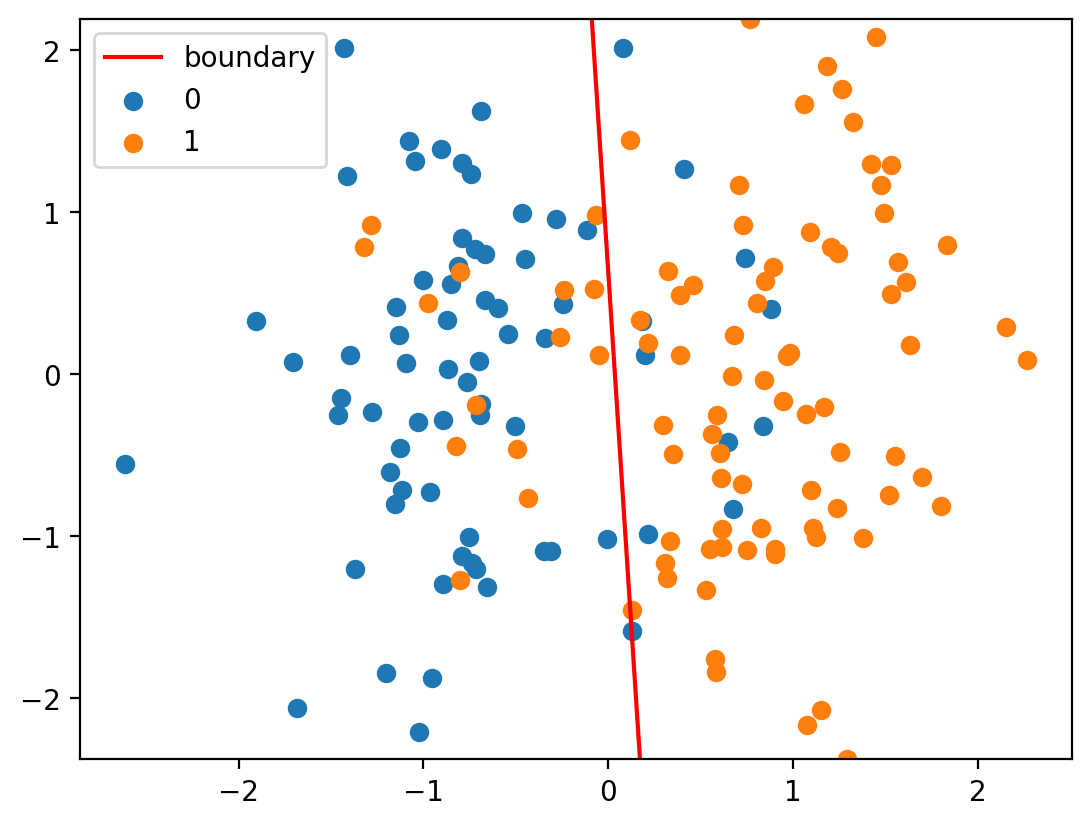

In [156]:
# 0 = theta0 + theta1 * x + theta2 * y
# y = (-theta0 - theta1 * x) / theta2
print(f"My logistic regression weights: {trainer.thetas}")
plot_decision_boundary(trainer.thetas, x_val)
plot_data(x_val, y_val)

model = LogisticRegression(penalty="l2", n_jobs=-1).fit(x_train, y_train)
print(f"Sklearn logisitic regression weights: {np.append(model.intercept_, model.coef_)}")
plot_decision_boundary(np.append(model.intercept_, model.coef_), x_val)
plot_data(x_val, y_val)

# Evaluation

In [157]:
# Evaluate your model on the test set
# ========== YOUR CODE STARTS HERE ==========
trainer.evaluate(x_test, y_test)
# ========== YOUR CODE ENDS HERE ==========
print(f"Test loss: {trainer.test_loss}")
print(f"Test acc: {trainer.test_acc}")

Test loss: 0.37038543274864394
Test acc: 0.88
